# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Azza Annathifa
- **Email:** azza.annathifa@student.ub.ac.id
- **ID Dicoding:** azza_annathifa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimanakah prospek keseringan peminjam sepeda pada musim dan hari libur tertentu dengan keterangan pengguna casual dan registered?
- Pertanyaan 2 : Bagaimanakah perbandingan pengguna casual dan registered pada jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
dayBike = pd.read_csv("https://raw.githubusercontent.com/azzameong/AnalisisDataDicoding/main/Bike-sharing-dataset/day.csv")
dayBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
hourBike = pd.read_csv("https://raw.githubusercontent.com/azzameong/AnalisisDataDicoding/main/Bike-sharing-dataset/hour.csv")
hourBike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pemeriksaan Tipe Data dayBike dan hourBike** 

In [35]:
dayBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
hourBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Pemeriksaan missing value pada dayBike & hourBike**

In [37]:
dayBike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
hourBike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Pemeriksaan duplikasi data pada dayBike dan hourBike**

In [39]:
print("Jumlah duplikasi: ", dayBike.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
print("Jumlah duplikasi: ", hourBike.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

**Terdapat Dtype object pada dayBike dan hourBike, sehingga perlu diperbaiki menjadi :**

In [41]:
dayBike_columns = ["dteday"]
 
for column in dayBike_columns:
  dayBike[column] = pd.to_datetime(dayBike[column])

In [42]:
hourBike_columns = ["dteday"]
 
for column in hourBike_columns:
  hourBike[column] = pd.to_datetime(hourBike[column])

**Pengecekan value kembali :**

In [43]:
dayBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [44]:
hourBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

**Masing-masing dayBike dan hourBike**

In [45]:
dayBike.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [46]:
hourBike.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Rangkuman keduanya**

In [47]:
dayBike.describe(include="all", datetime_is_numeric=True)
hourBike.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


[Pertanyaan 1] Melihat data dayBike berdasarkan season

In [48]:
dayBike.groupby(by=["season", "holiday"]).agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"]
})

casual                            registered        \
                  max   min         mean     sum        max   min   
season holiday                                                      
1      0         3155     9   336.074713   58477       5315   416   
       1          502   117   306.428571    2145       2627   573   
2      0         3410   120  1097.644444  197576       6456   674   
       1         2557   642  1486.500000    5946       5172  2484   
3      0         3160   118  1180.777174  217263       6917   889   
       1         3065  1236  2207.000000    8828       4841  2115   
4      0         3031     2   722.918605  124342       6946    20   
       1         1514   440   906.666667    5440       5172   935   

                                     
                       mean     sum  
season holiday                       
1      0        2304.919540  401056  
       1        1381.428571    9670  
2      0        3896.533333  701376  
       1        3422.750000   13691  
3      0        4462.146739  821035  
       1        3500.750000   14003  
4      0        4029.761628  693119  
       1        3118.666667   18712

[Pertanyaan 2] Melihat data hourBike berdasarkan waktu (namun nanti yang akan dipakai hanya "sum" saja)

In [49]:
hourBike.groupby(by="hr").agg({
    "cnt": "sum",
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"]
})

cnt casual                       registered                        
       sum    max min       mean    sum        max min        mean     sum
hr                                                                        
0    39130     68   0  10.158402   7375        234   0   43.739669   31755
1    24164     49   0   6.504144   4709        139   0   26.871547   19455
2    16352     44   0   4.772028   3412        104   0   18.097902   12940
3     8174     26   0   2.715925   1893         61   0    9.011478    6281
4     4428     13   0   1.253945    874         22   0    5.098996    3554
5    14261     16   0   1.411437   1012         64   0   18.478382   13249
6    55132     19   0   4.161379   3017        203   0   71.882759   52115
7   154171     40   0  11.055021   8037        572   1  201.009629  146134
8   261001     69   0  21.679505  15761        808   4  337.331499  245240
9   159438    142   0  30.891334  22458        399   6  188.418157  136980
10  126257    209   0  46.477304  33789        351   8  127.191197   92468
11  151320    268   0  59.540578  43286        446   5  148.602476  108034
12  184414    362   0  68.293956  49718        526   3  185.021978  134696
13  184919    355   0  72.308642  52713        491   9  181.352538  132206
14  175652    361   0  75.567901  55089        502  12  165.381344  120563
15  183149    357   0  74.905350  54606        456   4  176.327846  128543
16  227748    367   0  73.745205  53834        481   8  238.238356  173914
17  336860    347   0  74.273973  54220        885  14  387.178082  282640
18  309772    266   0  61.120879  44496        886  20  364.390110  265276
19  226789    230   0  48.770604  35505        662  11  262.752747  191284
20  164550    237   0  36.233516  26378        461   8  189.796703  138172
21  125445    222   0  28.255495  20570        362   6  144.059066  104875
22   95612    175   0  22.252747  16200        327   5  109.082418   79412
23   63941     71   0  15.199176  11065        220   2   72.631868   52876

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah prospek keseringan peminjam sepeda pada musim dan hari libur tertentu dengan keterangan pengguna casual dan registered?

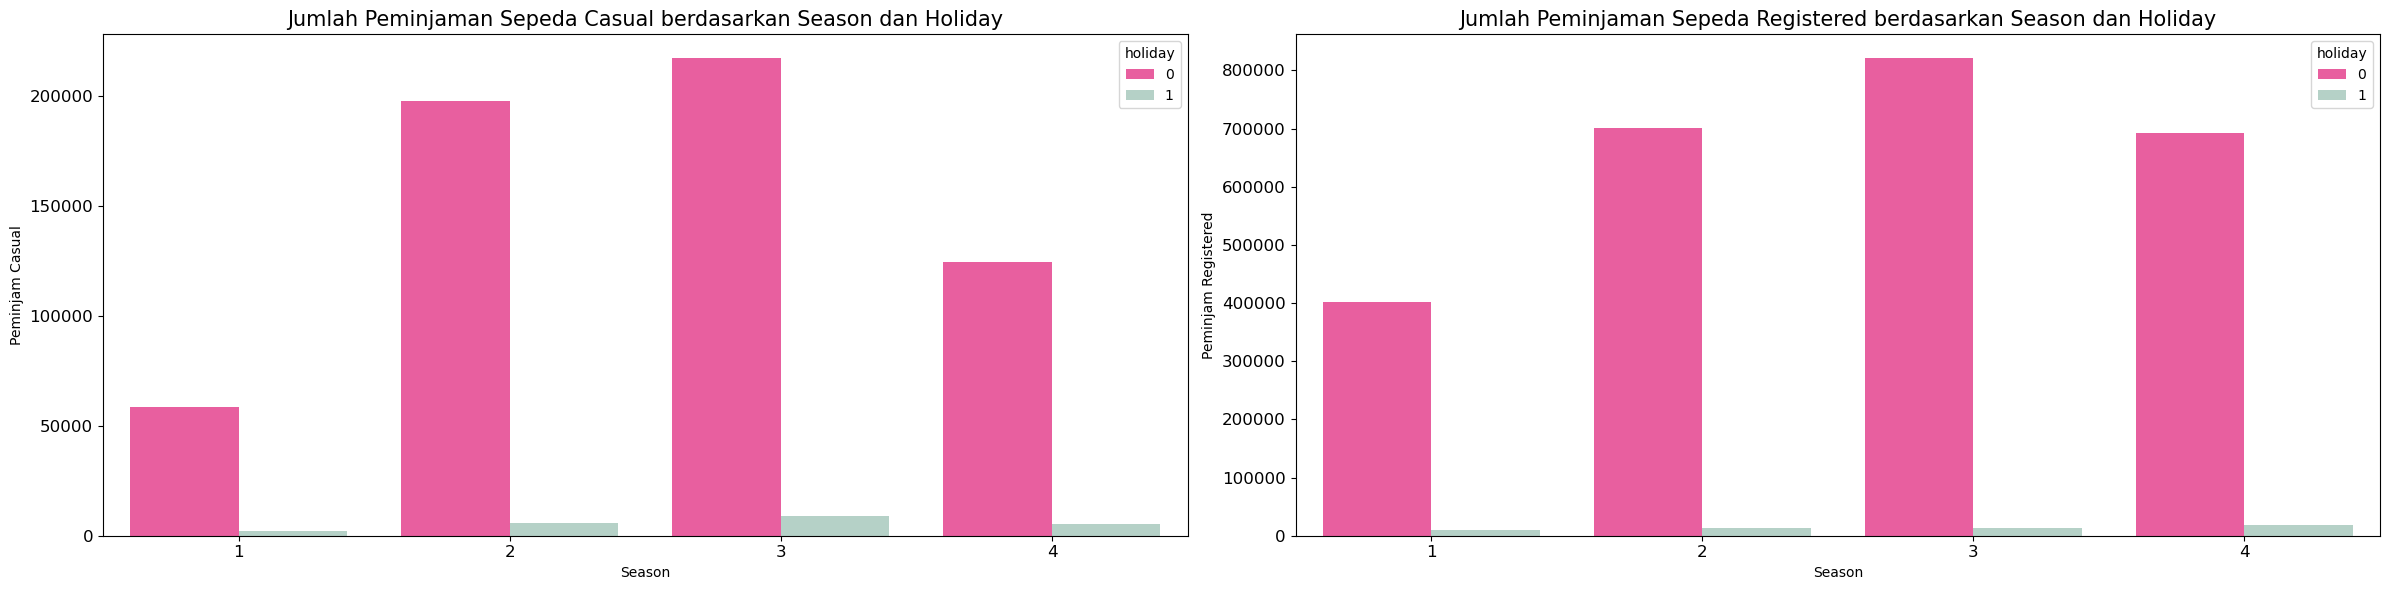

In [50]:
season_holiday = dayBike.groupby(by=["season", "holiday"]).agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"]
})

season_holiday = season_holiday.reset_index()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ['#FF489D','#b1d5c8','#FF489D','#b1d5c8']

sns.barplot(x="season", y=("casual", "sum"), hue="holiday", data=season_holiday, palette=colors, ax=axs[0])
axs[0].set_ylabel("Peminjam Casual")
axs[0].set_xlabel("Season")
axs[0].set_title("Jumlah Peminjaman Sepeda Casual berdasarkan Season dan Holiday", fontsize=15)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="season", y=("registered", "sum"), hue="holiday", data=season_holiday, palette=colors, ax=axs[1])
axs[1].set_ylabel("Peminjam Registered")
axs[1].set_xlabel("Season")
axs[1].set_title("Jumlah Peminjaman Sepeda Registered berdasarkan Season dan Holiday", fontsize=15)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimanakah perbandingan total pengguna casual dan registered pada jam tertentu?

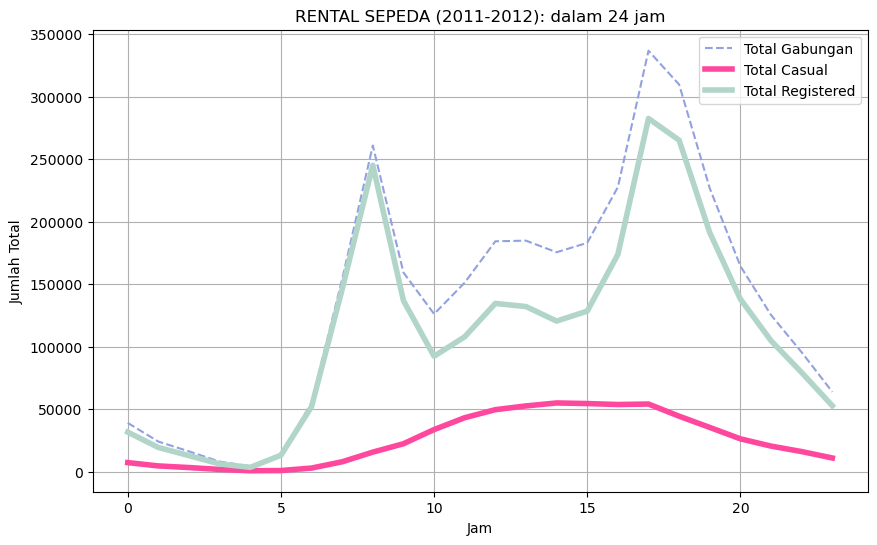

In [51]:
hourBehavior = hourBike.groupby(by=["hr"]).agg({
    "cnt": ["min", "max", "count", "sum"],
    "casual": "sum",
    "registered": "sum"
}).reset_index()

hours = hourBehavior['hr']
cntSum= hourBehavior['cnt']['sum']
casualSum = hourBehavior['casual']['sum']
registeredSum = hourBehavior['registered']['sum']

plt.figure(figsize=(10, 6))
plt.plot(hours, cntSum, label='Total Gabungan', color='#92a1e0',linestyle='--')
plt.plot(hours, casualSum, label='Total Casual',color='#FF489D', linewidth=4)
plt.plot(hours, registeredSum, label='Total Registered', color='#b1d5c8', linewidth=4)

plt.title('RENTAL SEPEDA (2011-2012): dalam 24 jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Total')
plt.legend()

plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dari grafik pertama, kita dapat melihat bagaimana perbandingan total peminjam sepeda baik casual dan registered pada tiap musim dan waktu liburan. Tabel dibagi menjadi dua, sebelah kiri mengindikasikan peminjam casual sedangkan tabel sebelah kanan mengindikasikan peminjam registered. Dapat disimpulkan jika peminjam registered lebih banyak dari peminjam casual.
- Conclution pertanyaan 2: Dari grafik tersebut, kita dapat melihat total peminjam sepeda baik casual dan registered.
Namun, yang ingin ditekankan disini adalah jumlah peminjam registered yang mayoritas lebih tinggi daripada peminjam casual sehingga dapat disimpulkan jika peminjam sepeda antusias untuk kembali lagi meminjam atau mendaftarkan diri sebagai registered. Oleh karena itu, bisnis ini dapat menjanjikan ke depannya terlebih lagi jika menambahkan fasilitas atau reward bagi peminjam terdaftar(registered).
Selain itu, informasi yang kita dapat adalah waktu tersepi peminjaman sepeda adalah ketika subuh dini hari sekitar pukul 3-4 pagi dan waktu terlaris peminjaman sepeda adalah ketika antara pukul 16.00-17.00.